# Fetch Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
import tensorflow.keras as keras

In [3]:
fashion_mnist_data = keras.datasets.fashion_mnist.load_data()

# Split Data

Here data is already splitted in tuple

In [4]:
(X_train_all, y_train_all), (X_test,y_test) = fashion_mnist_data
X_train,y_train = X_train_all[:-5000], y_train_all[:-5000]
X_valid,y_valid = X_train_all[-5000:], y_train_all[-5000:]

In [5]:
X_train.shape

(55000, 28, 28)

In [6]:
X_train.dtype

dtype('uint8')

# Scale pixel range in 0-1 scale

In [7]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

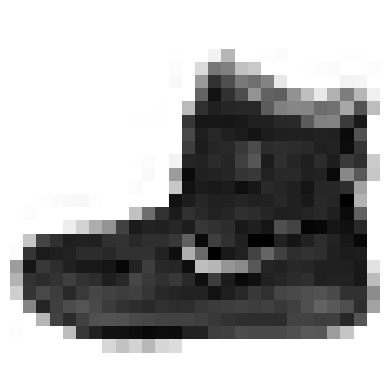

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [9]:
unique, counts = np.unique(y_train, return_counts=True)

print(unique)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[5479 5503 5510 5492 5473 5497 5533 5550 5485 5478]


In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Ankle boot'

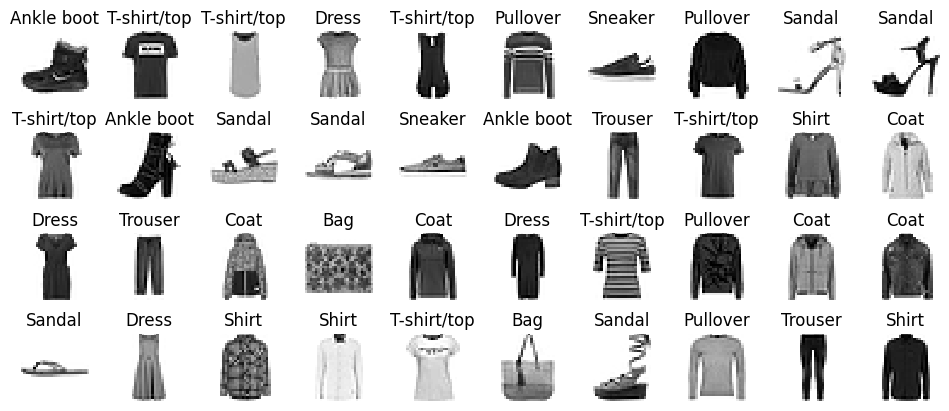

In [11]:
num_rows = 4
num_cols = 10

plt.figure(figsize=(num_cols*1.2, num_rows*1.2))

for row in range(num_rows):
    for col in range(num_cols):
        index = (num_cols * row) + col
        plt.subplot(num_rows, num_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Create Model using Sequential API

In [12]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
hidden1 = model.layers[1]
hidden1

In [15]:
model.get_layer("dense") is hidden1

True

In [16]:
weights, biases = hidden1.get_weights()
print(weights,biases)

[[-0.00659704 -0.02323638  0.0683711  ...  0.04566387 -0.04048197
   0.03017432]
 [-0.04681447  0.02342365  0.07340074 ... -0.05666416 -0.00926668
  -0.01745018]
 [-0.05698456  0.02619808 -0.04978412 ... -0.01921346  0.01259594
   0.03145115]
 ...
 [-0.00950371 -0.00292066  0.0595376  ... -0.05215599  0.07298398
  -0.01333205]
 [-0.06422061 -0.03911034 -0.07225206 ... -0.06611685  0.06356576
   0.03998195]
 [ 0.03103705 -0.05771986 -0.07097932 ...  0.00339818  0.04892919
  -0.00939372]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [17]:
weights.shape

(784, 300)

# Compile the model

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# This is same as below
#model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
#              optimizer=tf.keras.optimizers.SGD(),
#              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


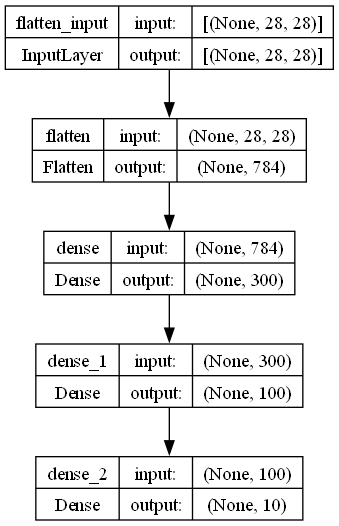

In [20]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [21]:
ohe =tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=6)
ohe

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
np.argmax(ohe, axis=1)

array([0, 5, 1, 0], dtype=int64)

# Model Training

In [23]:
history = model.fit(X_train, y_train, epochs=12, validation_data=(X_valid, y_valid))

Epoch 1/12
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7009 - accuracy: 0.7679 - val_loss: 0.4995 - val_accuracy: 0.8314
Epoch 2/12
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4826 - accuracy: 0.8329 - val_loss: 0.4673 - val_accuracy: 0.8306
Epoch 3/12
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4373 - accuracy: 0.8463 - val_loss: 0.4174 - val_accuracy: 0.8502
Epoch 4/12
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4124 - accuracy: 0.8549 - val_loss: 0.3920 - val_accuracy: 0.8592
Epoch 5/12
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3919 - accuracy: 0.8614 - val_loss: 0.3904 - val_accuracy: 0.8600
Epoch 6/12
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3756 - accuracy: 0.8673 - val_loss: 0.3914 - val_accuracy: 0.8660
Epoch 7/12
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3631 - accuracy: 0.8696 - val_loss: 0.3671 - val_accuracy:

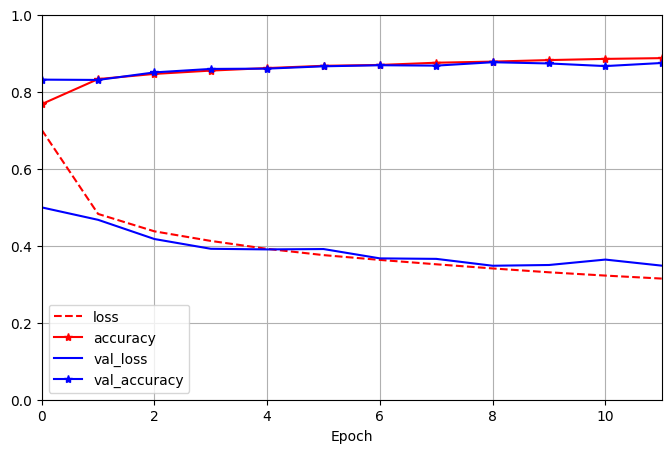

In [26]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize=(8,5), 
    xlim=[0,11], 
    ylim=[0,1], 
    grid=True, 
    xlabel="Epoch",
    style=["r--","r-*","b-","b-*"]
)
plt.legend(loc="lower left")
plt.show()

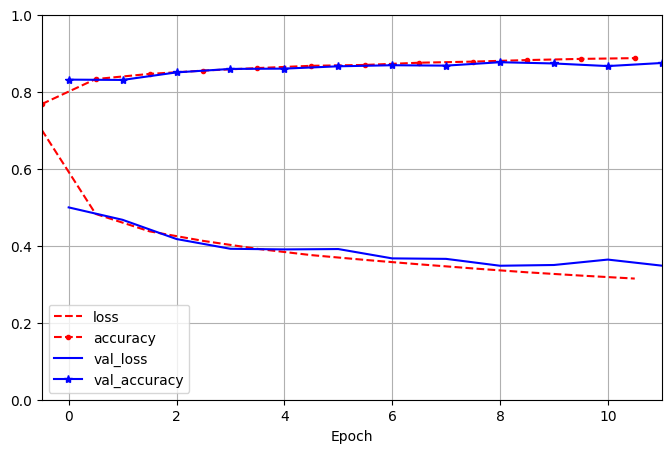

In [29]:
# shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 11, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

# Evaluation

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss, accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3711 - accuracy: 0.8642
0.3711280822753906 0.8641999959945679


# Run Predictions

In [33]:
X_new = X_test[:5]
y_prob_new = model.predict(X_new)
y_pred_new = y_prob_new.argmax(axis=-1)
print(y_prob_new)
print(y_pred_new)

1/1 [==============================] - 0s 28ms/step


[[1.32203213e-05 1.24505971e-06 4.82073556e-05 4.62962498e-06
  5.95382699e-06 2.85079926e-02 4.71287785e-05 8.85675997e-02
  1.87236094e-03 8.80931735e-01]
 [2.76688734e-05 5.52394340e-07 9.93752539e-01 1.25232361e-06
  2.11474602e-03 2.27259123e-09 4.09730850e-03 3.94040578e-10
  5.89237470e-06 5.09553333e-09]
 [1.45172853e-05 9.99979496e-01 1.09139637e-06 2.91509605e-06
  9.79679839e-07 1.86437518e-10 2.11530022e-07 7.79312170e-09
  6.90456034e-07 6.86971924e-10]
 [7.50769959e-06 9.99842763e-01 4.02324167e-06 1.38548567e-04
  4.88296837e-06 2.16356231e-08 1.22284644e-06 1.68568576e-07
  7.32822969e-07 1.00201554e-07]
 [5.15832156e-02 2.80012842e-04 8.44983757e-02 5.71299437e-03
  1.56867746e-02 9.68512268e-06 8.39818299e-01 9.10944436e-06
  2.37435056e-03 2.73370242e-05]]
[9 2 1 1 6]


In [34]:
np.array(class_names)[y_pred_new]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [36]:
y_new = y_test[:5]
np.array(class_names)[y_new]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')